In [1]:
import mlflow
import matplotlib
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 12
plt.rcParams['figure.autolayout'] = True

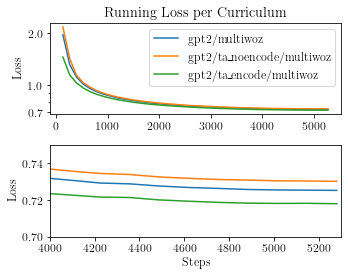

In [15]:
fig, ax = plt.subplots(figsize=(5, 4), nrows=2)
ax[0].set_title("Running Loss per Curriculum")
ax[0].set_yscale("log")
ax[0].set_yticks([0.7, 1, 2, 3])
ax[0].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
client = mlflow.tracking.MlflowClient()

for run in mlflow.list_run_infos('0')[:3]:
    metrics = client.get_metric_history(run.run_id, 'eval_loss')
    loss = [x.value for x in metrics]
    step = [x.step for x in metrics]
    name = client.get_run(run.run_id).data.params["output_dir"].lstrip("models/")
    ax[0].plot(step, loss, label=name)
    ax[1].plot(step, loss, label=name)
    ax[1].set_xlim(4000, 5300)
    ax[1].set_ylim(0.7, 0.75)
ax[1].set_xlabel("Steps")
ax[0].set_ylabel("Loss")
ax[1].set_ylabel("Loss")
ax[0].legend()
fig.savefig("loss.pdf", dpi=300)

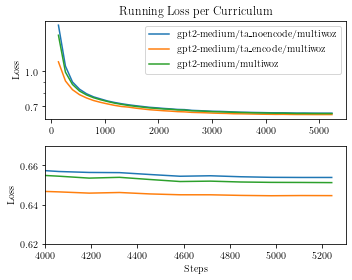

In [14]:
fig, ax = plt.subplots(figsize=(5, 4), nrows=2)
ax[0].set_title("Running Loss per Curriculum")
ax[0].set_yscale("log")
ax[0].set_yticks([0.7, 1, 2, 3])
ax[0].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
client = mlflow.tracking.MlflowClient()

for run in list(mlflow.list_run_infos('0')[i] for i in [0,1,4]):
    metrics = client.get_metric_history(run.run_id, 'eval_loss')
    loss = [x.value for x in metrics]
    step = [x.step for x in metrics]
    name = client.get_run(run.run_id).data.params["output_dir"].lstrip("models/")
    ax[0].plot(step, loss, label=name)
    ax[1].plot(step, loss, label=name)
    ax[1].set_xlim(4000, 5300)
    ax[1].set_ylim(0.62, 0.67)
ax[1].set_xlabel("Steps")
ax[0].set_ylabel("Loss")
ax[1].set_ylabel("Loss")
ax[0].legend()
fig.savefig("loss.pdf", dpi=300)